In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots
import shap

import events_package.utils as utils
from events_package.Experiment import Experiment
from events_package.config import FIVE_LAYERS
from events_package.input_getters import get_Y_1, get_X_5

In [2]:
Experiment.__version__

'5.0'

# 1. Importing Single Particle Data

## 1.1 Electrons

In [3]:
# importing data
dataset_df = pd.read_parquet(
    r"C:\Users\User1\Desktop\MSci_Project\Data\6_data\Electron\Parquet\1m_electron_pq_3"
)

electrons = Experiment(dataset_df, config=FIVE_LAYERS)
del dataset_df
electrons.length

444840

In [4]:
electrons.standard_procedure()

INFO: Removed duplicates
INFO: Denoisified the dataset
INFO: Shuffled dataset
INFO: Number of events after removing duplicates: 434998
INFO: Removed events with 0 energy in layers after denoisifying
INFO: Number of events after removing 0 energy (in calorimeters) events: 434998


## 1.2 Photons

In [5]:
dataset_df = pd.read_parquet(
    r"C:\Users\User1\Desktop\MSci_Project\Data\6_data\Photon\Parquet\1m_photon_pq"
)

photons = Experiment(dataset_df, config=FIVE_LAYERS)
del dataset_df
photons.length

444142

In [6]:
photons.standard_procedure()

INFO: Removed duplicates
INFO: Denoisified the dataset
INFO: Shuffled dataset
INFO: Number of events after removing duplicates: 434870
INFO: Removed events with 0 energy in layers after denoisifying
INFO: Number of events after removing 0 energy (in calorimeters) events: 434870


## 1.3 Neutral Pions

In [7]:
dataset_df = pd.read_parquet(
    r"C:\Users\User1\Desktop\MSci_Project\Data\6_data\PiZero\Parquet\pq_pi0_2"
)

pi0 = Experiment(dataset_df, config=FIVE_LAYERS)
del dataset_df
pi0.length

412856

In [8]:
pi0.standard_procedure()

INFO: Removed duplicates
INFO: Denoisified the dataset
INFO: Shuffled dataset
INFO: Number of events after removing duplicates: 391483
INFO: Removed events with 0 energy in layers after denoisifying
INFO: Number of events after removing 0 energy (in calorimeters) events: 391483


## 1.4 Charged Pions

In [9]:
dataset_df = pd.read_parquet(
    r"C:\Users\User1\Desktop\MSci_Project\Data\6_data\PiPlusMinus\Parquet\pq_piplusminus_2"
)

pi_char = Experiment(dataset_df, config=FIVE_LAYERS)
del dataset_df
pi_char.length

357554

In [10]:
pi_char.standard_procedure()

INFO: Removed duplicates
INFO: Denoisified the dataset
INFO: Shuffled dataset
INFO: Number of events after removing duplicates: 330809
INFO: Removed events with 0 energy in layers after denoisifying
INFO: Number of events after removing 0 energy (in calorimeters) events: 330803


# 2. Separate Models for Each Particle, Input Features Version 5

In [11]:
# hyperparameters used
params = {
    "objective": "reg:squarederror",
    "max_depth": 6,
    "learning_rate": 0.18,
    "colsample_bytree": 0.8,
    "eval_metric": "rmse",
    "n_estimators": 600,
}

In [12]:
# split electron data into training and testing, next train XGBoost model
electrons.train_test_split(get_X=get_X_5, get_Y=get_Y_1, test_size=0.2)
print(electrons.X_test.shape)

electrons.train_xgboost_model(params)

(87000, 22)
INFO: Trained XGBoost model; mean squared error: 1314.7785537433788


1314.7785537433788

In [13]:
x_e, y_e, x_u_e, u_e = utils.plot_avg(
    x_values=electrons.testing_dataset["et"].values,
    y_values=(electrons.y_test - electrons.y_pred),
    interval=2500,
    xlabel="true et [MeV]",
    rms=True,
    return_values=True,
    ylabel="rms",
    return_x_u=True,
    plot=False,
)

In [14]:
# split photon data into training and testing, next train XGBoost model
photons.train_test_split(get_X=get_X_5, get_Y=get_Y_1, test_size=0.2)
print(photons.X_test.shape)

photons.train_xgboost_model(params)

(86975, 22)
INFO: Trained XGBoost model; mean squared error: 1374.9357280483187


1374.9357280483187

In [15]:
x_p, y_p, x_u_p, u_p = utils.plot_avg(
    x_values=photons.testing_dataset["et"].values,
    y_values=(photons.y_test - photons.y_pred),
    interval=2500,
    xlabel="true et [MeV]",
    rms=True,
    return_values=True,
    ylabel="rms",
    return_x_u=True,
    plot=False,
)

In [16]:
# split neutral pion data into training and testing, next train XGBoost model
pi0.train_test_split(get_X=get_X_5, get_Y=get_Y_1, test_size=0.2)
print(pi0.X_test.shape)

pi0.train_xgboost_model(params)

(78297, 22)
INFO: Trained XGBoost model; mean squared error: 3468.209907521194


3468.209907521194

In [17]:
x_pi0, y_pi0, x_u_pi0, u_pi0 = utils.plot_avg(
    x_values=pi0.testing_dataset["et"].values,
    y_values=(pi0.y_test - pi0.y_pred),
    interval=2500,
    xlabel="true et [MeV]",
    rms=True,
    return_values=True,
    ylabel="rms",
    return_x_u=True,
    plot=False,
)

In [18]:
# split charged pion data into training and testing, next train XGBoost model
pi_char.train_test_split(get_X=get_X_5, get_Y=get_Y_1, test_size=0.2)
print(pi_char.X_test.shape)

pi_char.train_xgboost_model(params)

(66161, 22)
INFO: Trained XGBoost model; mean squared error: 9518.208520108661


9518.208520108661

In [19]:
x_pi_char, y_pi_char, x_u_pi_char, u_pi_char = utils.plot_avg(
    x_values=pi_char.testing_dataset["et"].values,
    y_values=(pi_char.y_test - pi_char.y_pred),
    interval=2500,
    xlabel="true et [MeV]",
    rms=True,
    return_values=True,
    ylabel="rms",
    return_x_u=True,
    plot=False,
)

# 2.1 SHAP Plots for Each of the Models

In [20]:
feature_names = [
    "psb eta",
    "emb1 eta",
    "emb2 eta",
    "emb3 eta",
    "hab1 eta",
    "psb - emb1 eta",
    "emb1 - emb2 eta",
    "emb2 - emb3 eta",
    "emb3 - hab1 eta",
    "psb(4)",
    "psb(5) - psb(3)",
    "emb1(8)",
    "emb1(9) - emb1(7)",
    "emb1(10) - emb1(6)",
    "emb1(11) - emb1(5)",
    "emb1(12) - emb1(4)",
    "emb2(4)",
    "emb2(5) - emb2(3)",
    "emb3(4)",
    "emb3(5) - emb3(3)",
    "hab1(4)",
    "hab1(5) - hab1(3)",
]

[12:52:25] WARNING: D:\bld\xgboost-split_1703076524143\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


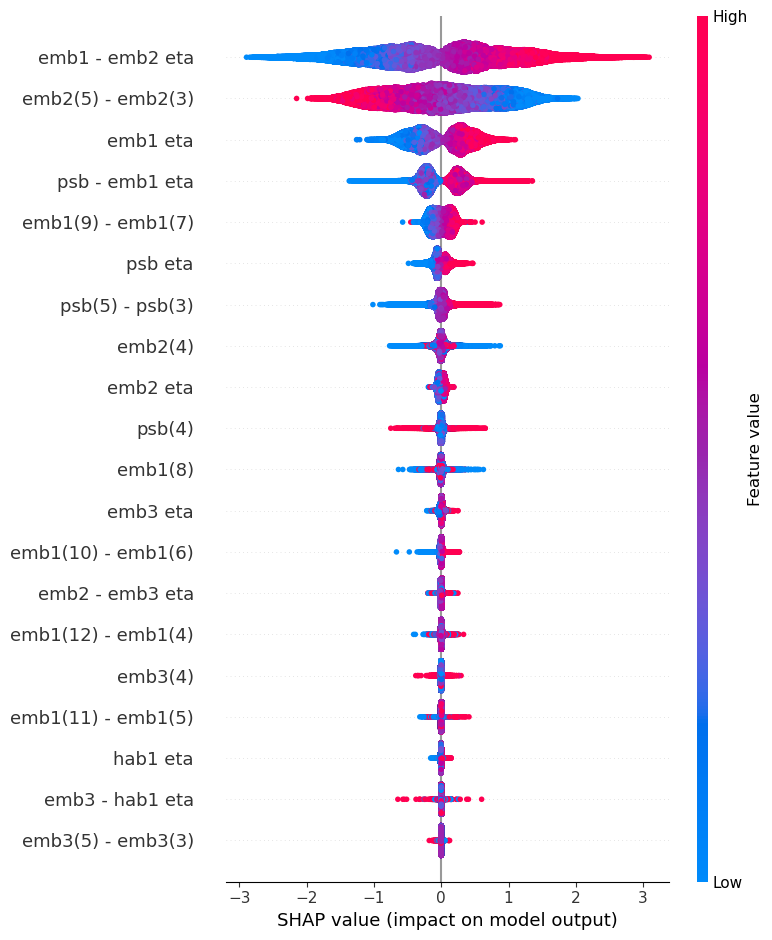

In [21]:
model = electrons.model
explainer = shap.TreeExplainer(model, check_additivity=False)

shap_values = explainer.shap_values(electrons.X_train, check_additivity=False)

shap.summary_plot(shap_values, electrons.X_train, feature_names=feature_names)

[12:58:06] WARNING: D:\bld\xgboost-split_1703076524143\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


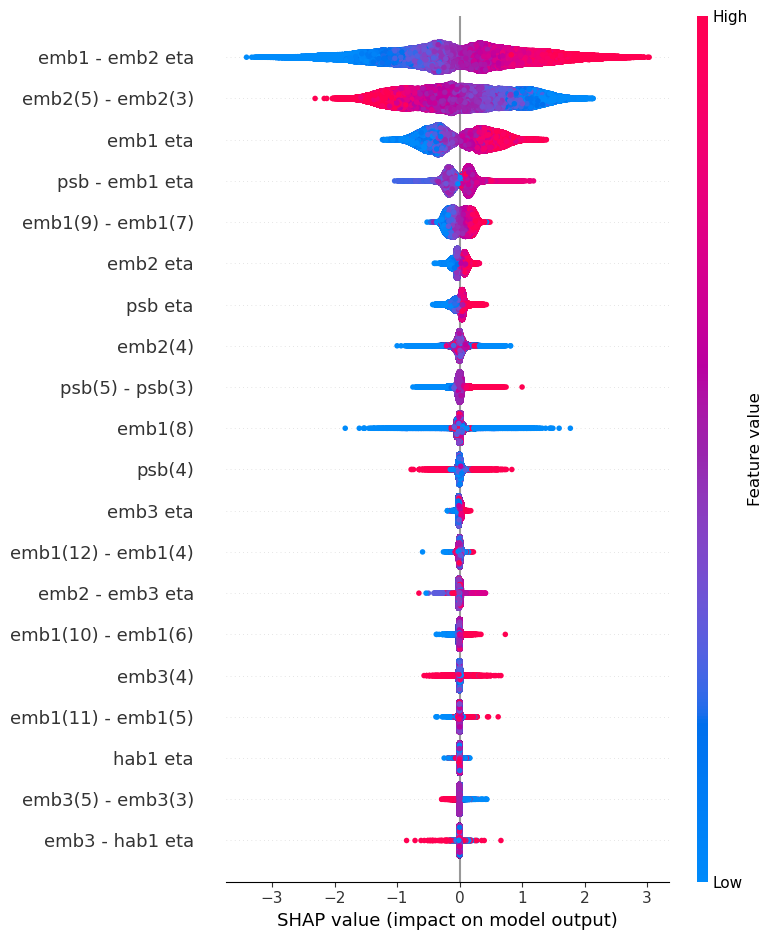

In [22]:
model = photons.model
explainer = shap.TreeExplainer(model, check_additivity=False)

shap_values = explainer.shap_values(photons.X_train, check_additivity=False)

shap.summary_plot(shap_values, photons.X_train, feature_names=feature_names)

[13:03:38] WARNING: D:\bld\xgboost-split_1703076524143\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


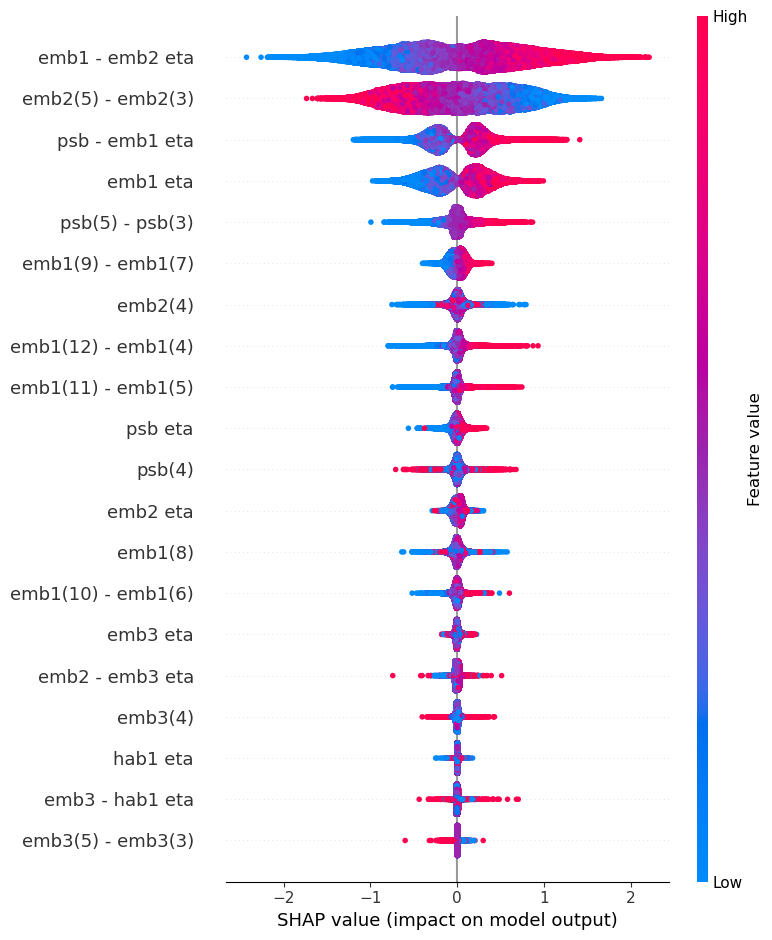

In [23]:
model = pi0.model
explainer = shap.TreeExplainer(model, check_additivity=False)

shap_values = explainer.shap_values(pi0.X_train, check_additivity=False)

shap.summary_plot(shap_values, pi0.X_train, feature_names=feature_names)

[13:08:58] WARNING: D:\bld\xgboost-split_1703076524143\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


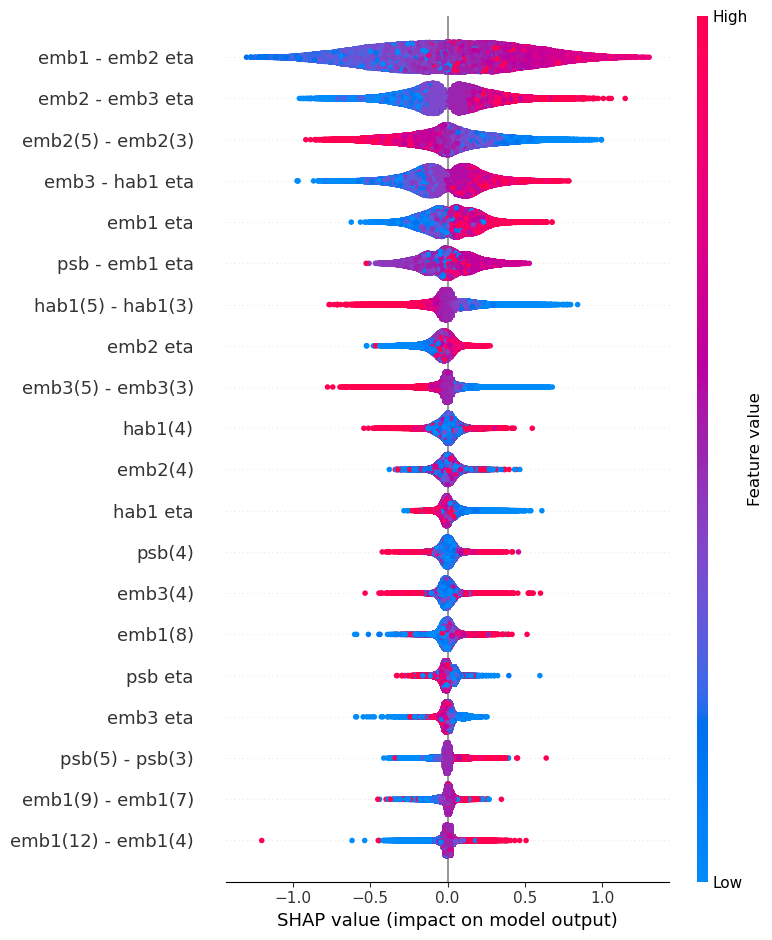

In [24]:
model = pi_char.model
explainer = shap.TreeExplainer(model, check_additivity=False)

shap_values = explainer.shap_values(pi_char.X_train, check_additivity=False)

shap.summary_plot(shap_values, pi_char.X_train, feature_names=feature_names)

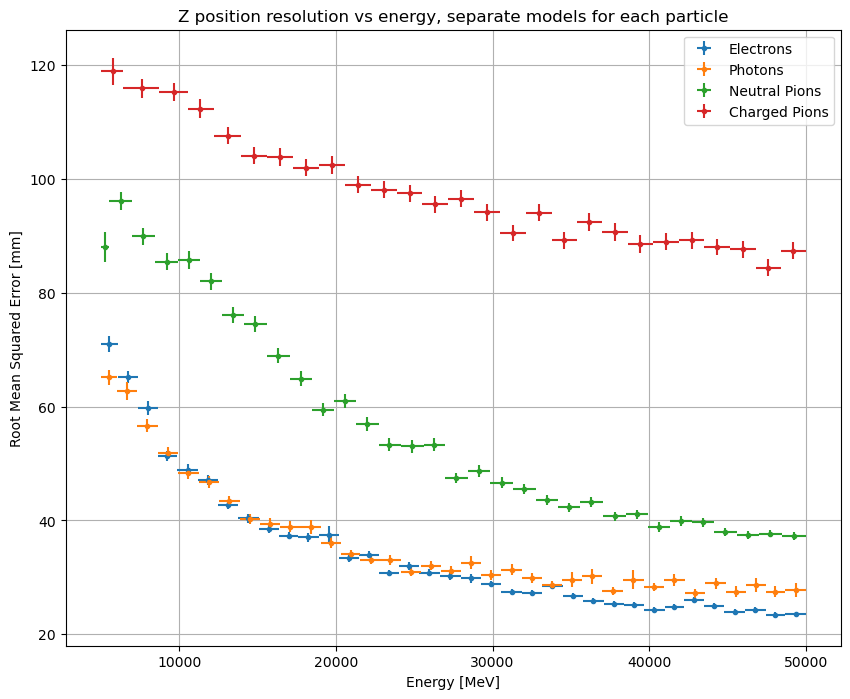

In [25]:
plt.figure(figsize=(10, 8))
plt.errorbar(x_e, y_e, xerr=x_u_e, yerr=u_e, fmt=".", label="Electrons")
plt.errorbar(x_p, y_p, xerr=x_u_p, yerr=u_p, fmt=".", label="Photons")
plt.errorbar(x_pi0, y_pi0, xerr=x_u_pi0, yerr=u_pi0, fmt=".", label="Neutral Pions")
plt.errorbar(
    x_pi_char,
    y_pi_char,
    xerr=x_u_pi_char,
    yerr=u_pi_char,
    fmt=".",
    label="Charged Pions",
)


# Adding labels and title
plt.xlabel("Energy [MeV]")
plt.ylabel("Root Mean Squared Error [mm]")
plt.title("Z position resolution vs energy, separate models for each particle")

plt.legend()
plt.grid()
plt.show()

# 3. Single Model for all Particles

In [26]:
# add types to allow for identification later
electrons.add_physics_object_type(typ="electron")
photons.add_physics_object_type(typ="photon")
pi0.add_physics_object_type(typ="pi0")
pi_char.add_physics_object_type(typ="pi_char")

In [27]:
# connect datasets into a single dataset
full_df = pd.concat(
    [electrons.dataset, photons.dataset, pi0.dataset, pi_char.dataset],
    ignore_index=True,
)

# experiment = Experiment(dataframe=full_df, config=FIVE_LAYERS)

experiment = electrons + photons + pi0 + pi_char

In [28]:
# all previous datasets have already been denoisified, duplicates were removed, no need to do it now
# in fact, doing it would delete some good events
experiment.shuffle_dataset(repeats=11)
print(experiment.length)

1592154


In [29]:
# split data into training and testing, next train XGBoost model
experiment.train_test_split(get_X=get_X_5, get_Y=get_Y_1, test_size=0.2)
print(experiment.X_test.shape)

experiment.train_xgboost_model(params)  # 3738.1236594832044

(318431, 22)
INFO: Trained XGBoost model; mean squared error: 3738.2218767895943


3738.2218767895943

In [30]:
mask_e = experiment.testing_dataset.physics_object_type == "electron"
mask_p = experiment.testing_dataset.physics_object_type == "photon"
mask_pi0 = experiment.testing_dataset.physics_object_type == "pi0"
mask_pi_char = experiment.testing_dataset.physics_object_type == "pi_char"

In [43]:
x_e_2, y_e_2, x_u_e_2, u_e_2 = utils.plot_avg(
    x_values=experiment.testing_dataset["et"].values[mask_e],
    y_values=(experiment.y_test - experiment.y_pred)[mask_e],
    interval=3000,
    xlabel="true et [MeV]",
    rms=True,
    return_values=True,
    ylabel="rms",
    return_x_u=True,
    plot=False,
)

In [32]:
x_p_2, y_p_2, x_u_p_2, u_p_2 = utils.plot_avg(
    x_values=experiment.testing_dataset["et"].values[mask_p],
    y_values=(experiment.y_test - experiment.y_pred)[mask_p],
    interval=2500,
    xlabel="true et [MeV]",
    rms=True,
    ylabel="rms",
    return_values=True,
    return_x_u=True,
    plot=False,
)

In [39]:
x_pi0_2, y_pi0_2, x_u_pi0_2, u_pi0_2 = utils.plot_avg(
    x_values=experiment.testing_dataset["et"].values[mask_pi0],
    y_values=(experiment.y_test - experiment.y_pred)[mask_pi0],
    interval=2500,
    xlabel="true et [MeV]",
    rms=True,
    ylabel="rms",
    return_values=True,
    return_x_u=True,
    plot=False,
)

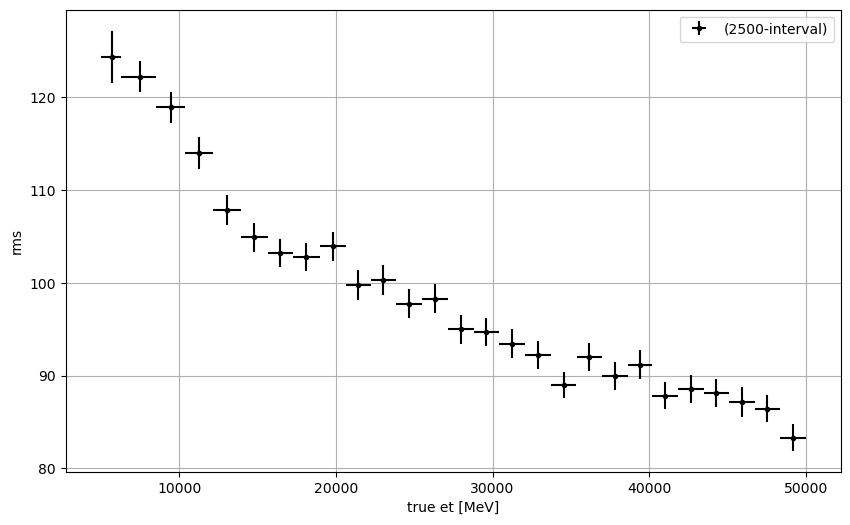

In [40]:
x_pi_char_2, y_pi_char_2, x_u_pi_char_2, u_pi_char_2 = utils.plot_avg(
    x_values=experiment.testing_dataset["et"].values[mask_pi_char],
    y_values=(experiment.y_test - experiment.y_pred)[mask_pi_char],
    interval=2500,
    xlabel="true et [MeV]",
    rms=True,
    return_values=True,
    ylabel="rms",
    return_x_u=True,
    plot=True,
)

[13:14:56] WARNING: D:\bld\xgboost-split_1703076524143\work\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


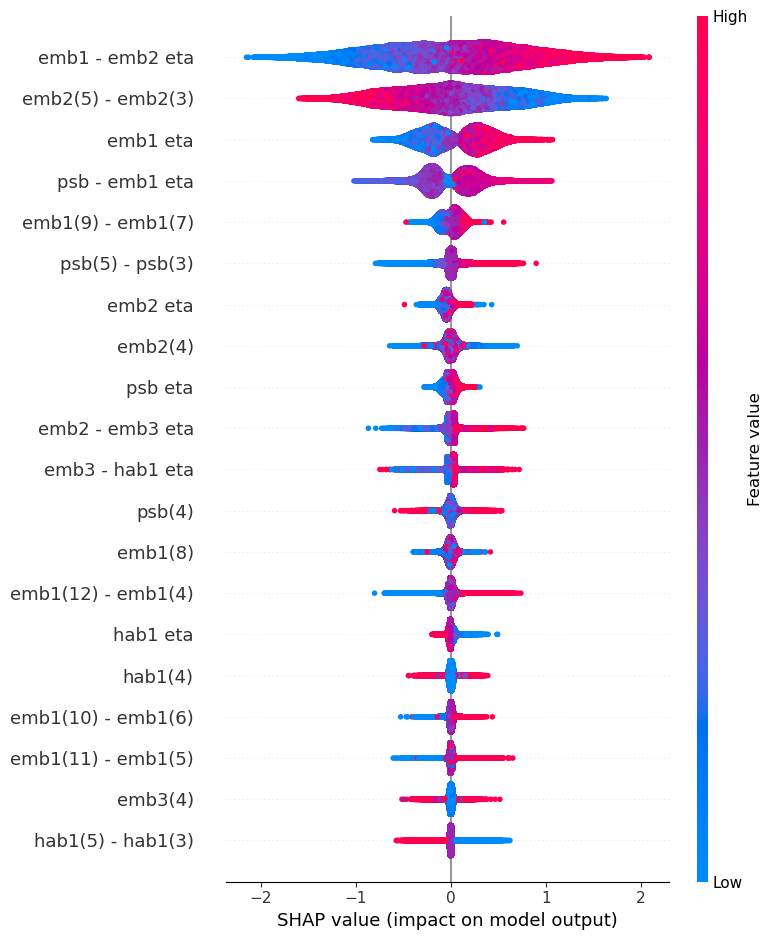

In [35]:
model = experiment.model
explainer = shap.TreeExplainer(model, check_additivity=False)

shap_values = explainer.shap_values(experiment.X_train, check_additivity=False)

shap.summary_plot(shap_values, experiment.X_train, feature_names=feature_names)

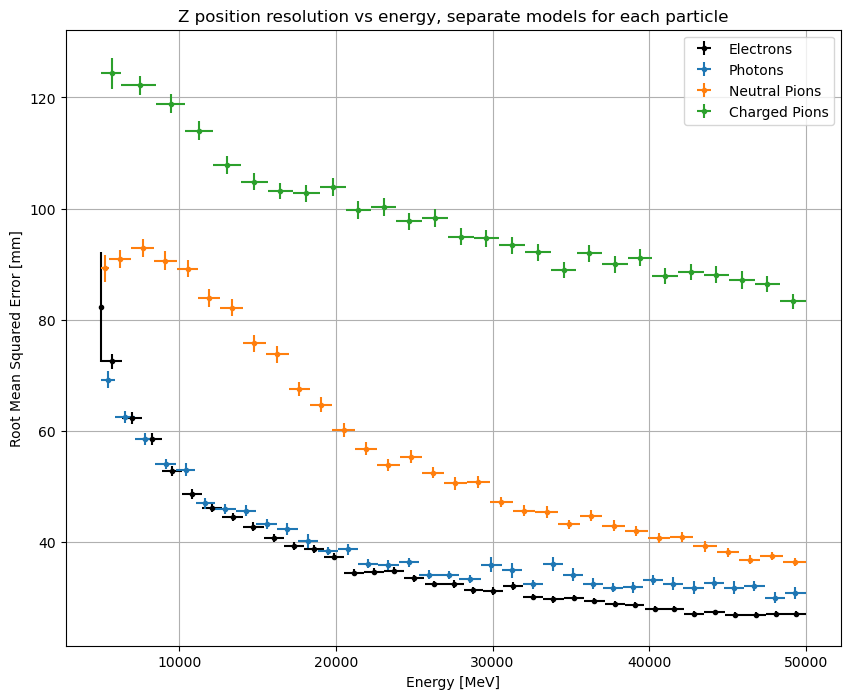

In [41]:
plt.figure(figsize=(10, 8))
plt.errorbar(
    x_e_2, y_e_2, xerr=x_u_e_2, yerr=u_e_2, fmt=".", label="Electrons", color="k"
)
plt.errorbar(x_p_2, y_p_2, xerr=x_u_p_2, yerr=u_p_2, fmt=".", label="Photons")
plt.errorbar(
    x_pi0_2, y_pi0_2, xerr=x_u_pi0_2, yerr=u_pi0_2, fmt=".", label="Neutral Pions"
)
plt.errorbar(
    x_pi_char_2,
    y_pi_char_2,
    xerr=x_u_pi_char_2,
    yerr=u_pi_char_2,
    fmt=".",
    label="Charged Pions",
)


# Adding labels and title
plt.xlabel("Energy [MeV]")
plt.ylabel("Root Mean Squared Error [mm]")
plt.title("Z position resolution vs energy, separate models for each particle")

plt.legend()
plt.grid()
plt.show()

# 4. Separate vs Single Models - Comparison

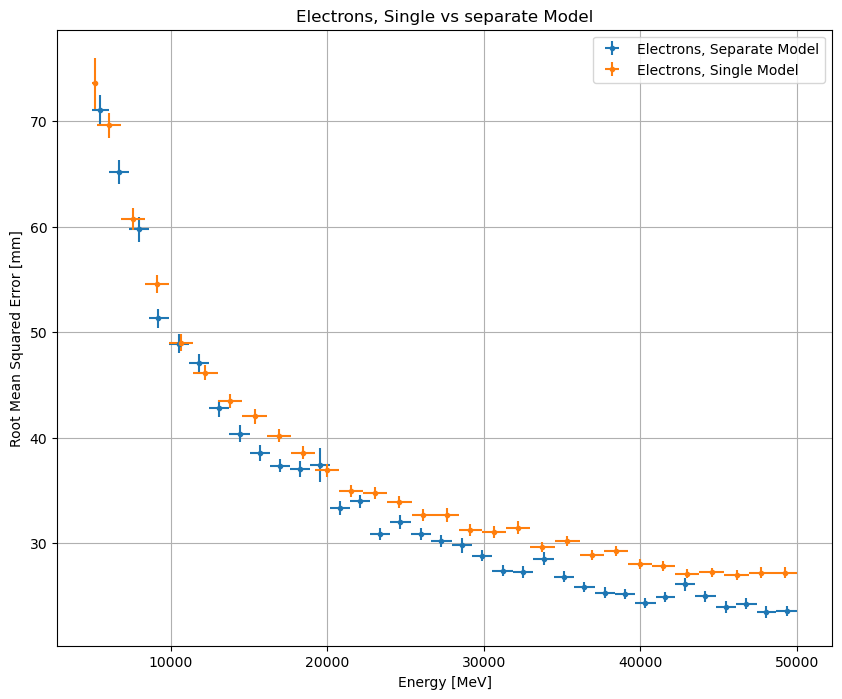

In [44]:
plt.figure(figsize=(10, 8))
plt.errorbar(x_e, y_e, xerr=x_u_e, yerr=u_e, fmt=".", label="Electrons, Separate Model")
plt.errorbar(
    x_e_2, y_e_2, xerr=x_u_e_2, yerr=u_e_2, fmt=".", label="Electrons, Single Model"
)


# Adding labels and title
plt.xlabel("Energy [MeV]")
plt.ylabel("Root Mean Squared Error [mm]")
plt.title("Electrons, Single vs separate Model")

plt.legend()
plt.grid()
plt.show()

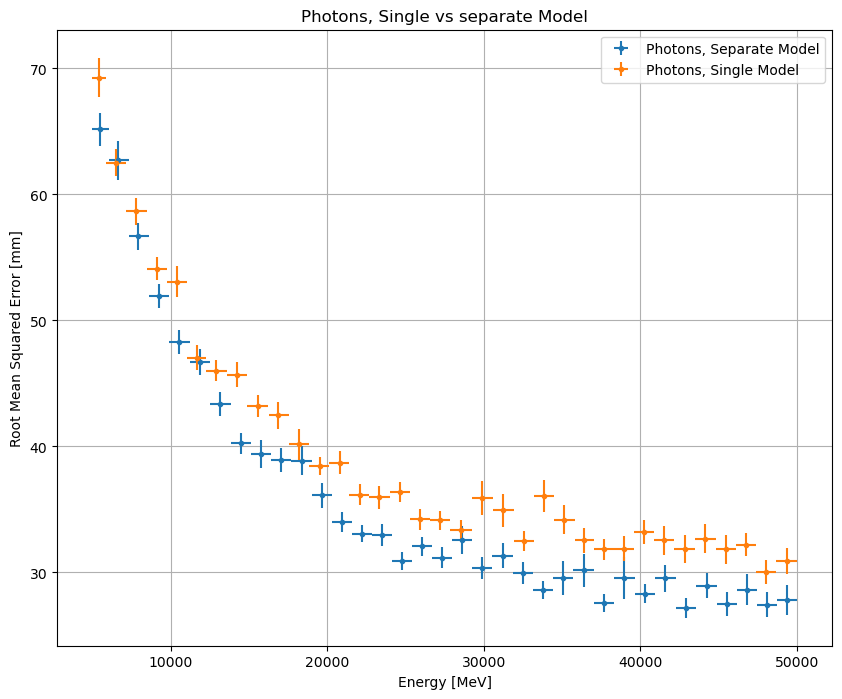

In [45]:
plt.figure(figsize=(10, 8))
plt.errorbar(x_p, y_p, xerr=x_u_p, yerr=u_p, fmt=".", label="Photons, Separate Model")
plt.errorbar(
    x_p_2, y_p_2, xerr=x_u_p_2, yerr=u_p_2, fmt=".", label="Photons, Single Model"
)


# Adding labels and title
plt.xlabel("Energy [MeV]")
plt.ylabel("Root Mean Squared Error [mm]")
plt.title("Photons, Single vs separate Model")

plt.legend()
plt.grid()
plt.show()

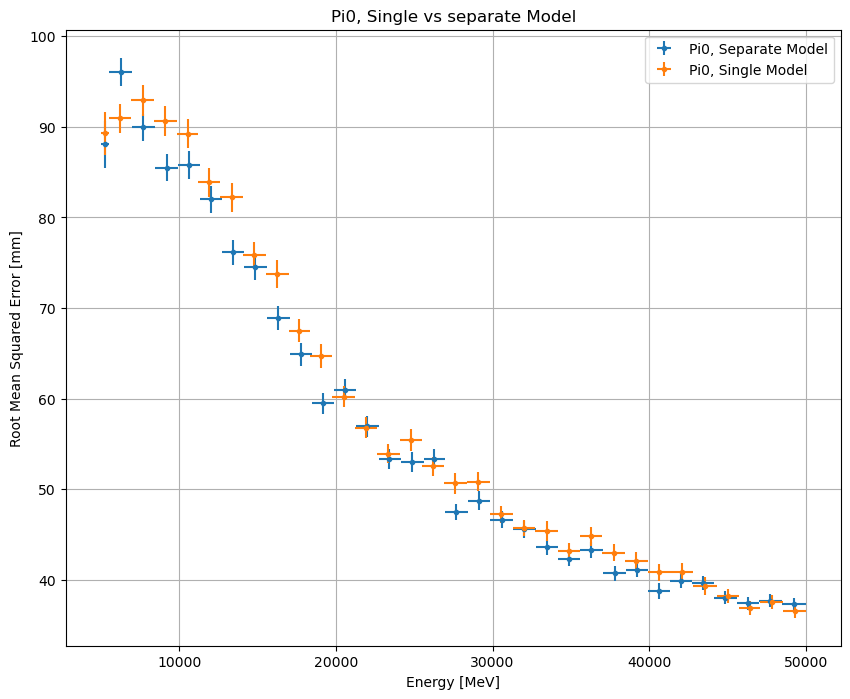

In [46]:
plt.figure(figsize=(10, 8))
plt.errorbar(
    x_pi0, y_pi0, xerr=x_u_pi0, yerr=u_pi0, fmt=".", label="Pi0, Separate Model"
)
plt.errorbar(
    x_pi0_2, y_pi0_2, xerr=x_u_pi0_2, yerr=u_pi0_2, fmt=".", label="Pi0, Single Model"
)


# Adding labels and title
plt.xlabel("Energy [MeV]")
plt.ylabel("Root Mean Squared Error [mm]")
plt.title("Pi0, Single vs separate Model")

plt.legend()
plt.grid()
plt.show()

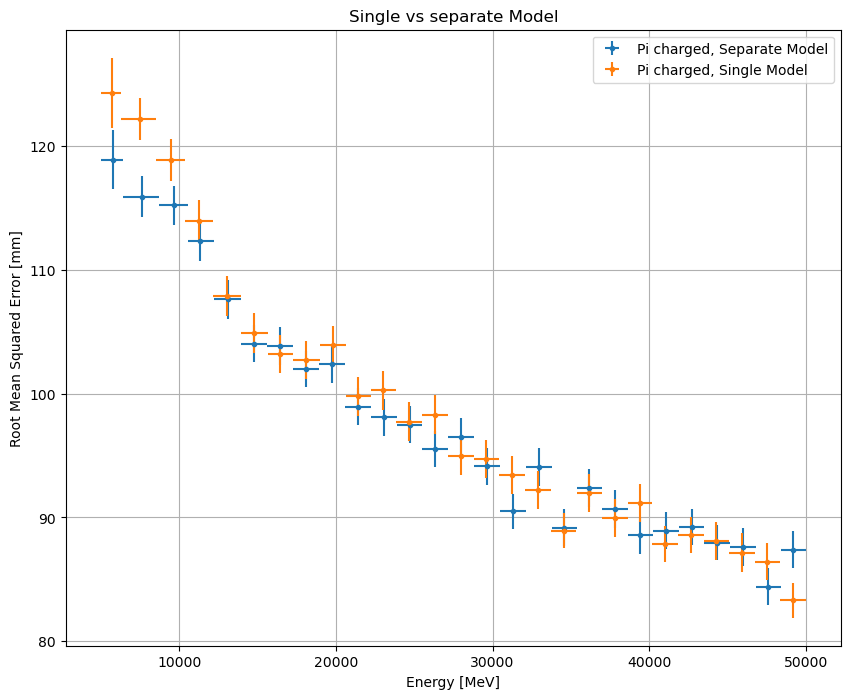

In [47]:
plt.figure(figsize=(10, 8))
plt.errorbar(
    x_pi_char,
    y_pi_char,
    xerr=x_u_pi_char,
    yerr=u_pi_char,
    fmt=".",
    label="Pi charged, Separate Model",
)
plt.errorbar(
    x_pi_char_2,
    y_pi_char_2,
    xerr=x_u_pi_char_2,
    yerr=u_pi_char_2,
    fmt=".",
    label="Pi charged, Single Model",
)


# Adding labels and title
plt.xlabel("Energy [MeV]")
plt.ylabel("Root Mean Squared Error [mm]")
plt.title("Single vs separate Model")

plt.legend()
plt.grid()
plt.show()